In [1]:
# 1.Importing the basic working libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Working with os module - os is a module in Python 3.
# Its main purpose is to interact with the operating system. 
# It provides functionalities to manipulate files and folders.

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['income.csv']


In [3]:
print('# File sizes')
for f in os.listdir('../input'):
    print(f.ljust(30) + str(round(os.path.getsize('../input/' + f) / 1000000, 2)) + 'MB')

# File sizes
income.csv                    3.84MB


In [4]:
# 2.Importing the dataset using pandas library
income = pd.read_csv("../input/income.csv")
income_c = pd.read_csv("../input/income.csv")

In [5]:
income
# 3.By looking into the dataset, there may not be required to remove any columns in this present scenario. After preprocessing we may check if any is needed.
# education_num, fnlwgt may not be useful for model building
# education_num is for indicating number of years of education
# fnlwgt - The fnlwgt which is the final weight determined by the Census Organization
# is of no use in any of the analysis that we are doing henceforth and is removed.
#The educationnum if a repetitive variable which recodes the categorical variable education as a 
#numeric variable but will be used in the analysis for decision trees, hence is not being removed.


Age         Work_class  Fnlwgt    Education  Education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

           Maritial_Status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [6]:
# 4.Basic Analysis: identifying the datatypes, finding basicstats for each column.
income.info()
# There are 9 object datatypes and 6 int datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age                32561 non-null int64
Work_class         32561 non-null object
Fnlwgt             32561 non-null int64
Education          32561 non-null object
Education_num      32561 non-null int64
Maritial_Status    32561 non-null object
Occupation         32561 non-null object
Relationship       32561 non-null object
Race               32561 non-null object
Sex                32561 non-null object
Capital_gain       32561 non-null int64
Capital_loss       32561 non-null int64
Hours_per_week     32561 non-null int64
Native_country     32561 non-null object
Income             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
income.columns
# names of all the varaibles.

Index(['Age', 'Work_class', 'Fnlwgt', 'Education', 'Education_num',
       'Maritial_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
# finding no of missing values for each variable
income.isnull().sum()
# there is no missing values in this dataset

Age                0
Work_class         0
Fnlwgt             0
Education          0
Education_num      0
Maritial_Status    0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital_gain       0
Capital_loss       0
Hours_per_week     0
Native_country     0
Income             0
dtype: int64

 Pandas-profiling report for the dataset:

In [9]:
import pandas_profiling as pp
pp.ProfileReport(income)

In [10]:
income.corr()

Age    Fnlwgt  Education_num  Capital_gain  Capital_loss  \
Age             1.000000 -0.076646       0.036527      0.077674      0.057775   
Fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
Education_num   0.036527 -0.043195       1.000000      0.122630      0.079923   
Capital_gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
Capital_loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
Hours_per_week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                Hours_per_week  
Age                   0.068756  
Fnlwgt               -0.018768  
Education_num         0.148123  
Capital_gain          0.078409  
Capital_loss          0.054256  
Hours_per_week        1.000000

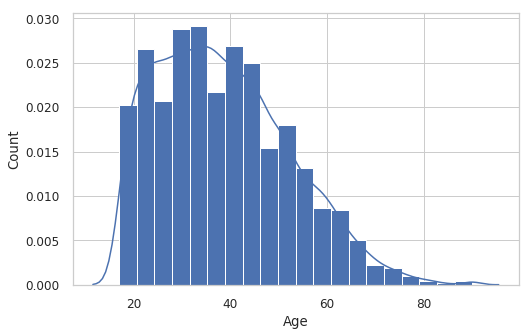

In [11]:
# Data Visualization - univariate and bivariate analysis 
# Univariate analysis
#age
#sns.distplot(income.Age,kde=False,rug=True)
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    income['Age'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Age', ylabel='Count');
# kde = kernel density estimate
# rugplot = At every observation, it will draw a small vertical stick.
# from the below graph,concluded that age between late twenties and early thirties are present more 

In [12]:
income.dtypes

Age                 int64
Work_class         object
Fnlwgt              int64
Education          object
Education_num       int64
Maritial_Status    object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country     object
Income             object
dtype: object

In [13]:
numerical_d = income.select_dtypes(include='int64')
numerical_d

Age  Fnlwgt  Education_num  Capital_gain  Capital_loss  Hours_per_week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32561 rows x 6 columns]

In [14]:
categorical_d = income.select_dtypes(include ='object')
categorical_d

Work_class    Education      Maritial_Status  \
0              State-gov    Bachelors        Never-married   
1       Self-emp-not-inc    Bachelors   Married-civ-spouse   
2                Private      HS-grad             Divorced   
3                Private         11th   Married-civ-spouse   
4                Private    Bachelors   Married-civ-spouse   
...                  ...          ...                  ...   
32556            Private   Assoc-acdm   Married-civ-spouse   
32557            Private      HS-grad   Married-civ-spouse   
32558            Private      HS-grad              Widowed   
32559            Private      HS-grad        Never-married   
32560       Self-emp-inc      HS-grad   Married-civ-spouse   

               Occupation    Relationship    Race      Sex  Native_country  \
0            Adm-clerical   Not-in-family   White     Male   United-States   
1         Exec-managerial         Husband   White     Male   United-States   
2       Handlers-cleaners   Not-in-family   White     Male   United-States   
3       Handlers-cleaners         Husband   Black     Male   United-States   
4          Prof-specialty            Wife   Black   Female            Cuba   
...                   ...             ...     ...      ...             ...   
32556        Tech-support            Wife   White   Female   United-States   
32557   Machine-op-inspct         Husband   White     Male   United-States   
32558        Adm-clerical       Unmarried   White   Female   United-States   
32559        Adm-clerical       Own-child   White     Male   United-States   
32560     Exec-managerial            Wife   White   Female   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 9 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea068b40b8>,
      dtype=object)

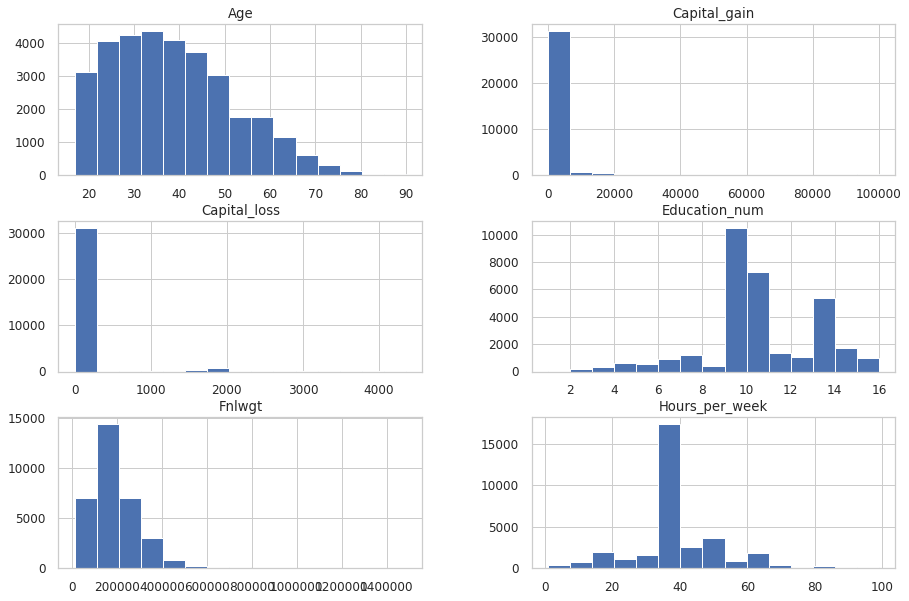

In [15]:
numerical_d.hist(bins=15,figsize=(15,10),layout=(3,2))
# From the below graphs on numerical data, Age is +vely skewed, kurtosis
# More no of people aged late 30's are present
# Most no of people worked for 35 - 40 hrs in the dataset
# More people educated for 9-10 years
# Capital_gain and Capital_loss have more no of zeros

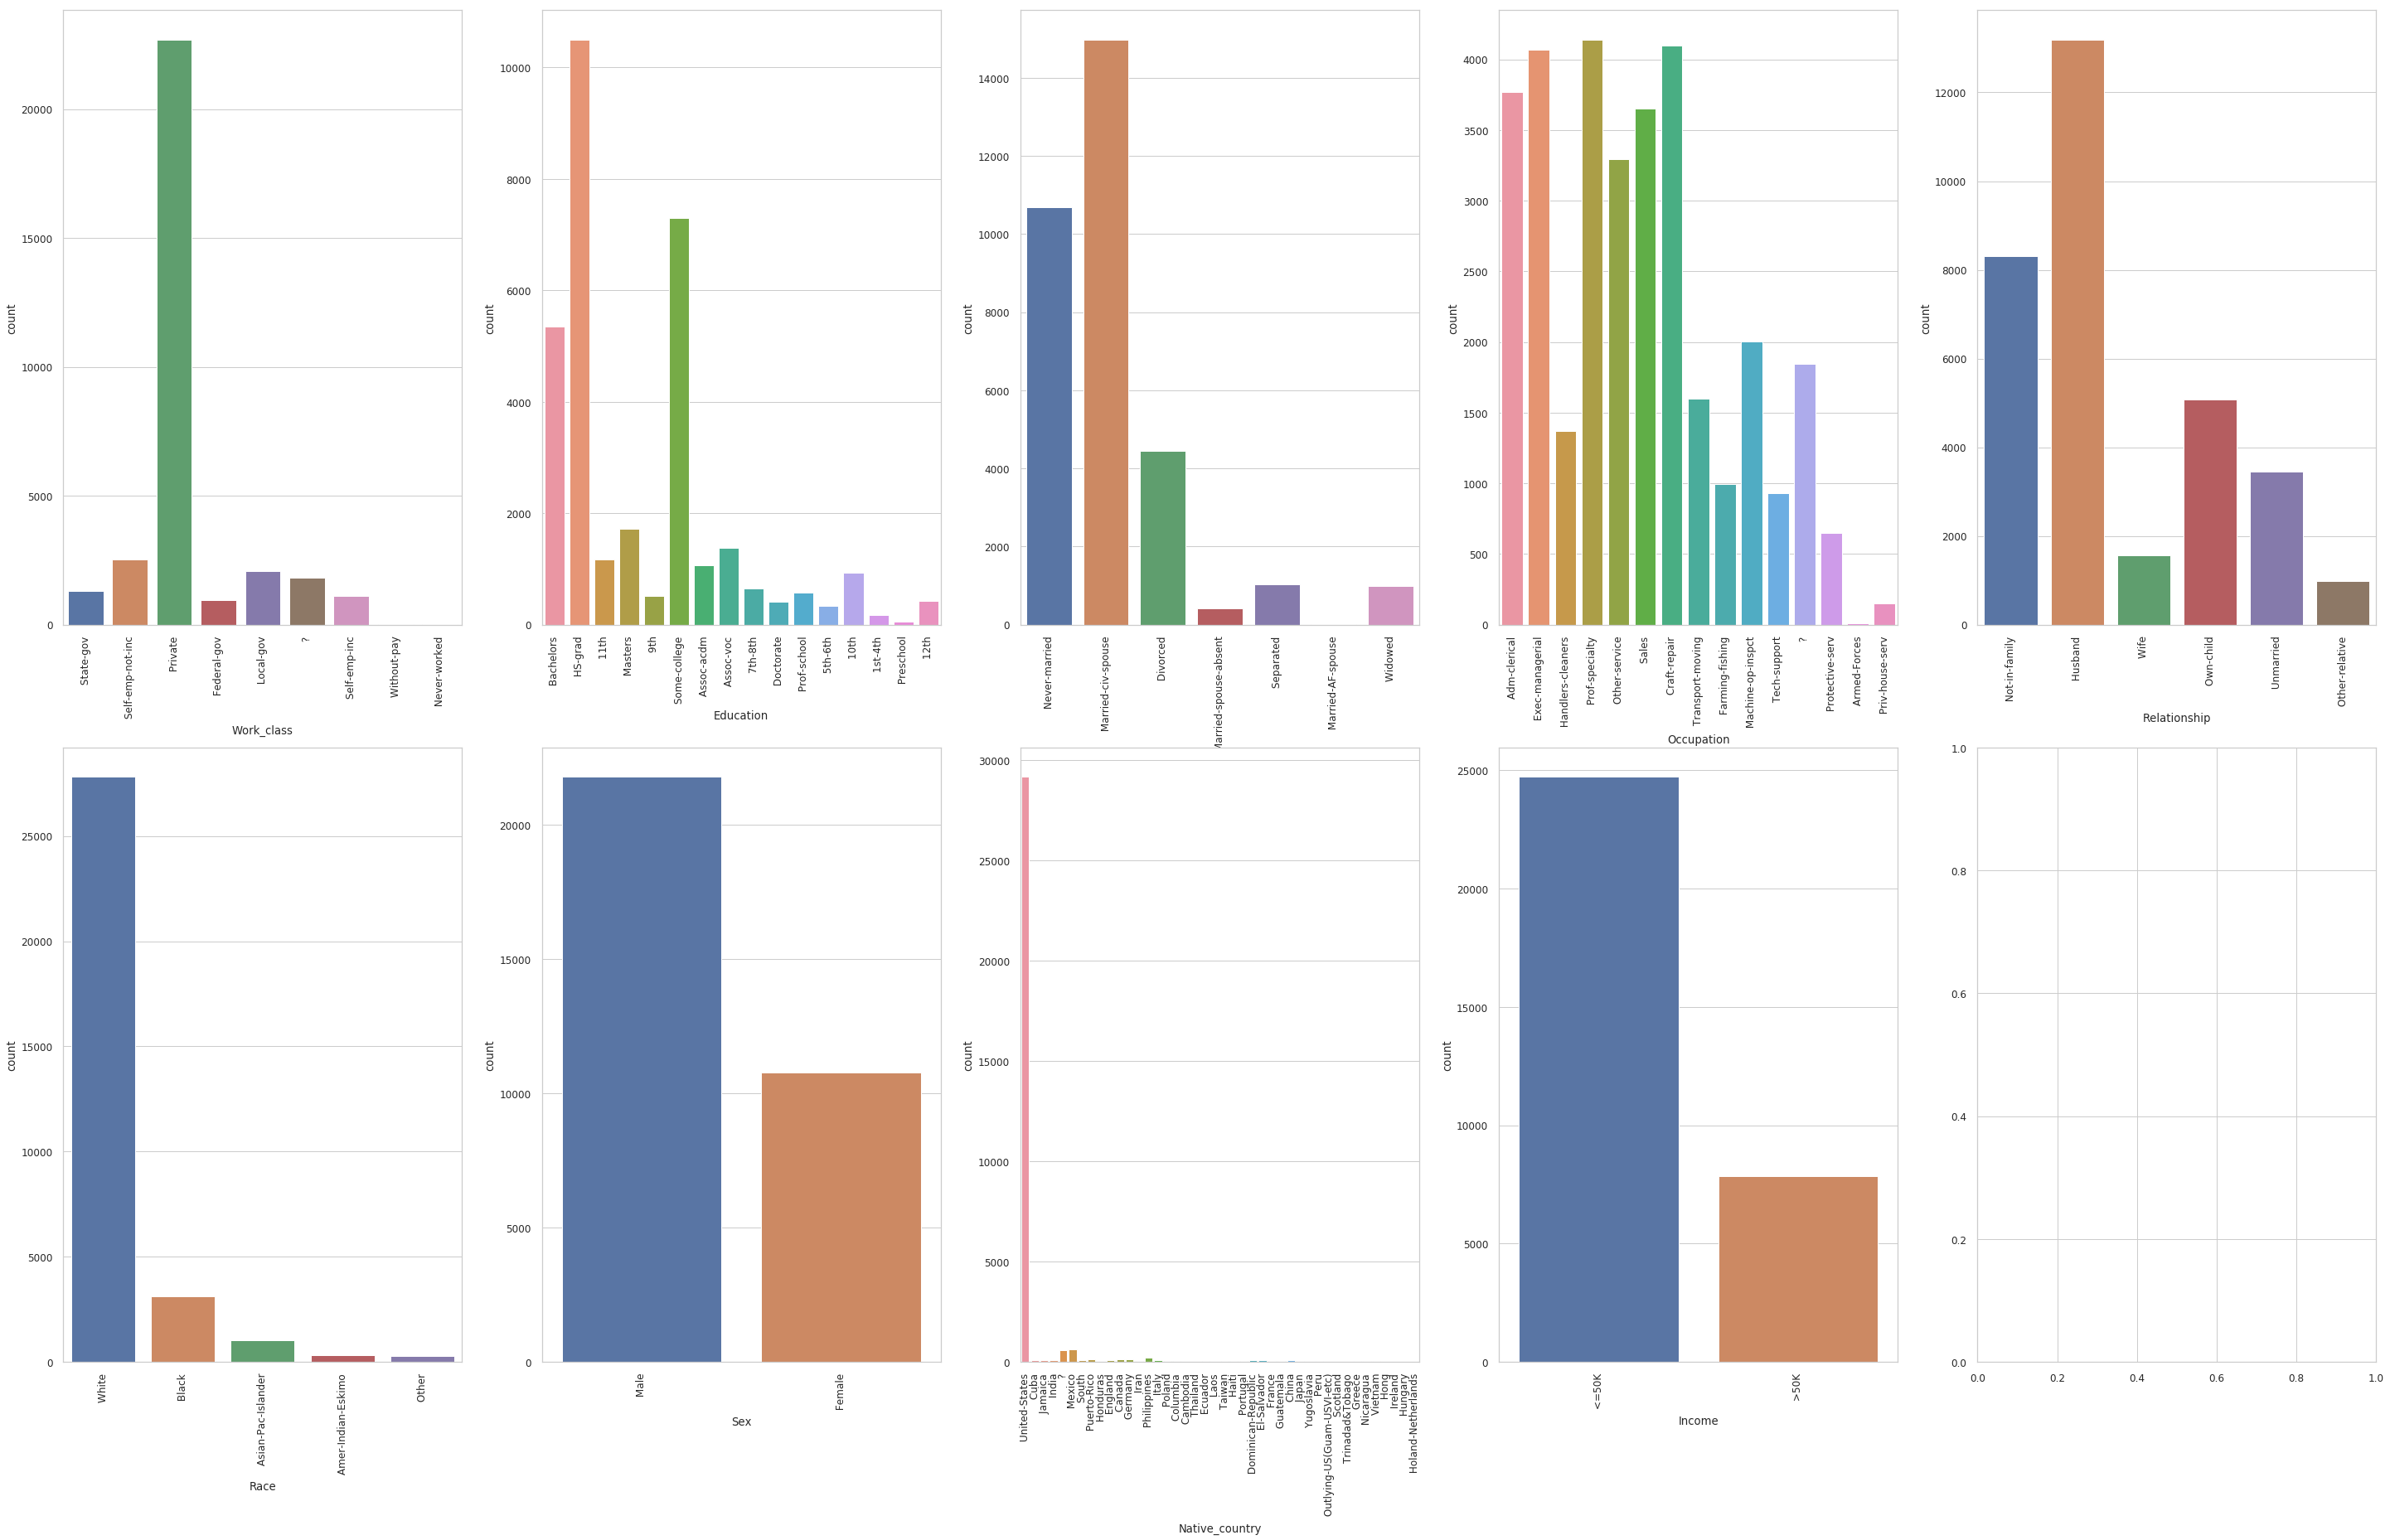

In [16]:
fig, ax = plt.subplots(2, 5, figsize=(50, 30))
for variable, subplot in zip(categorical_d, ax.flatten()):
    sns.countplot(income[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
# From the beolw graphs :
# 1.More no of people working for private sector
# 2.More no of people educated upto HS-grad
# 3.More no of people are Married-civ-spouse
# 4.More no of people are in occupations - prof-speciality, craft repair, Exec-managerial
# 5.More no of people are white, male and belong to united states of america

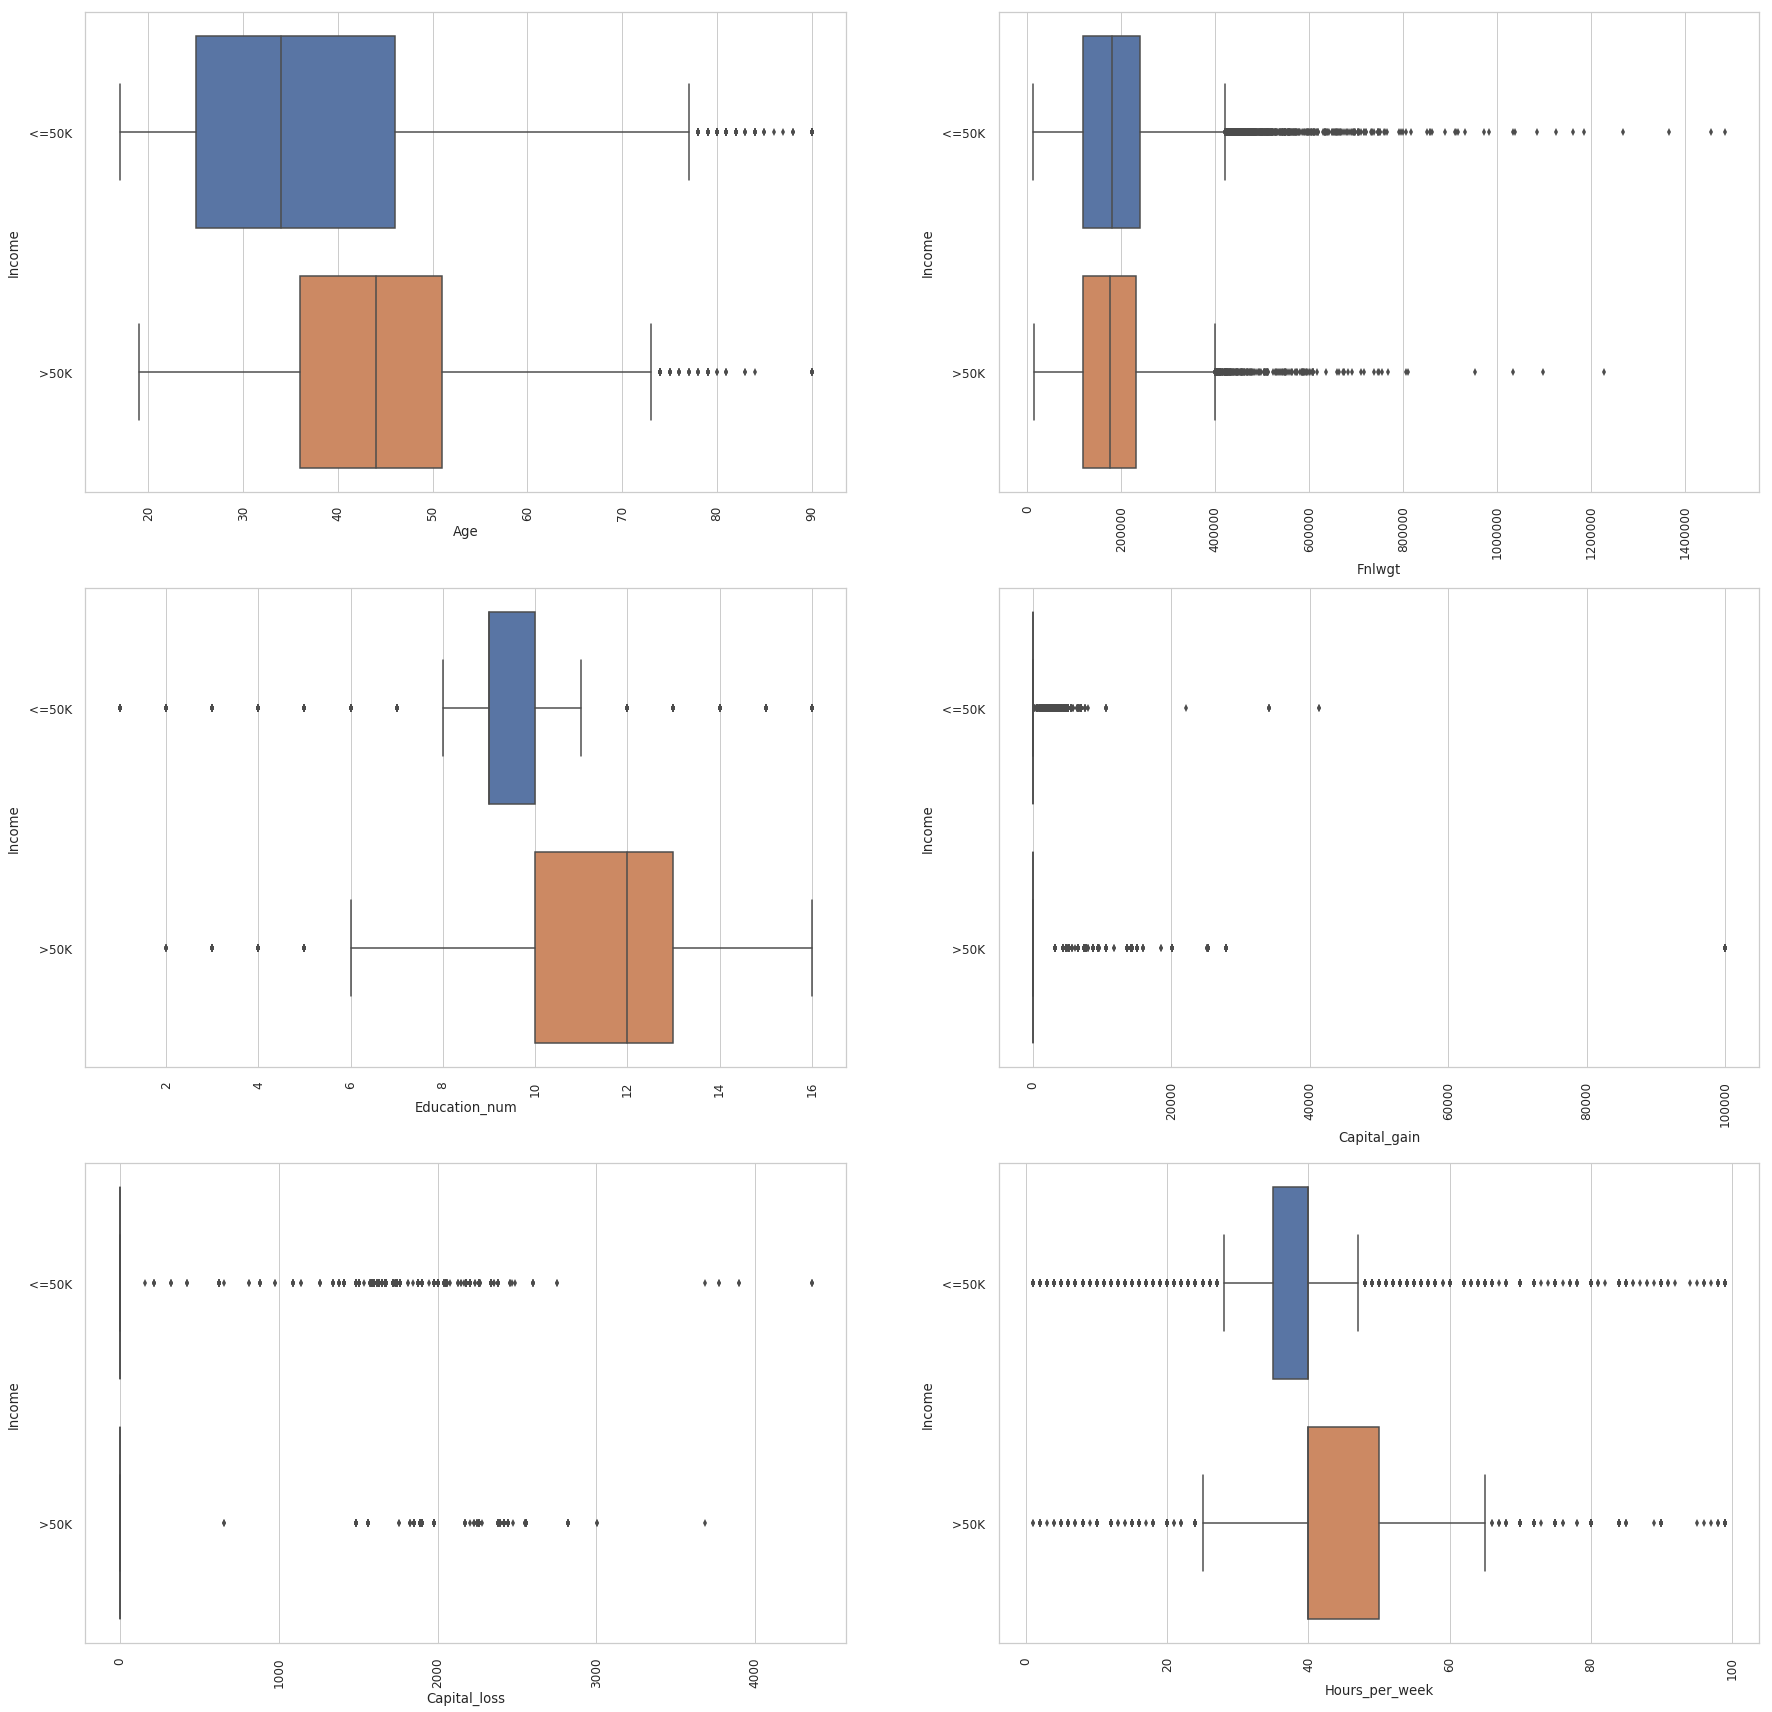

In [17]:
fig, ax = plt.subplots(3, 2, figsize=(30, 30))
for variable, subplot in zip(numerical_d, ax.flatten()):
    sns.boxplot(income[variable],income['Income'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
# More no of people earning >50k are aged between 35-50 and working for 35-40 hours
# More no of people earning <=50k are aged between 25-45 and working for 40-50 hours 
# finalwgt, capital_gain, capital_loss doesn't gave any information required

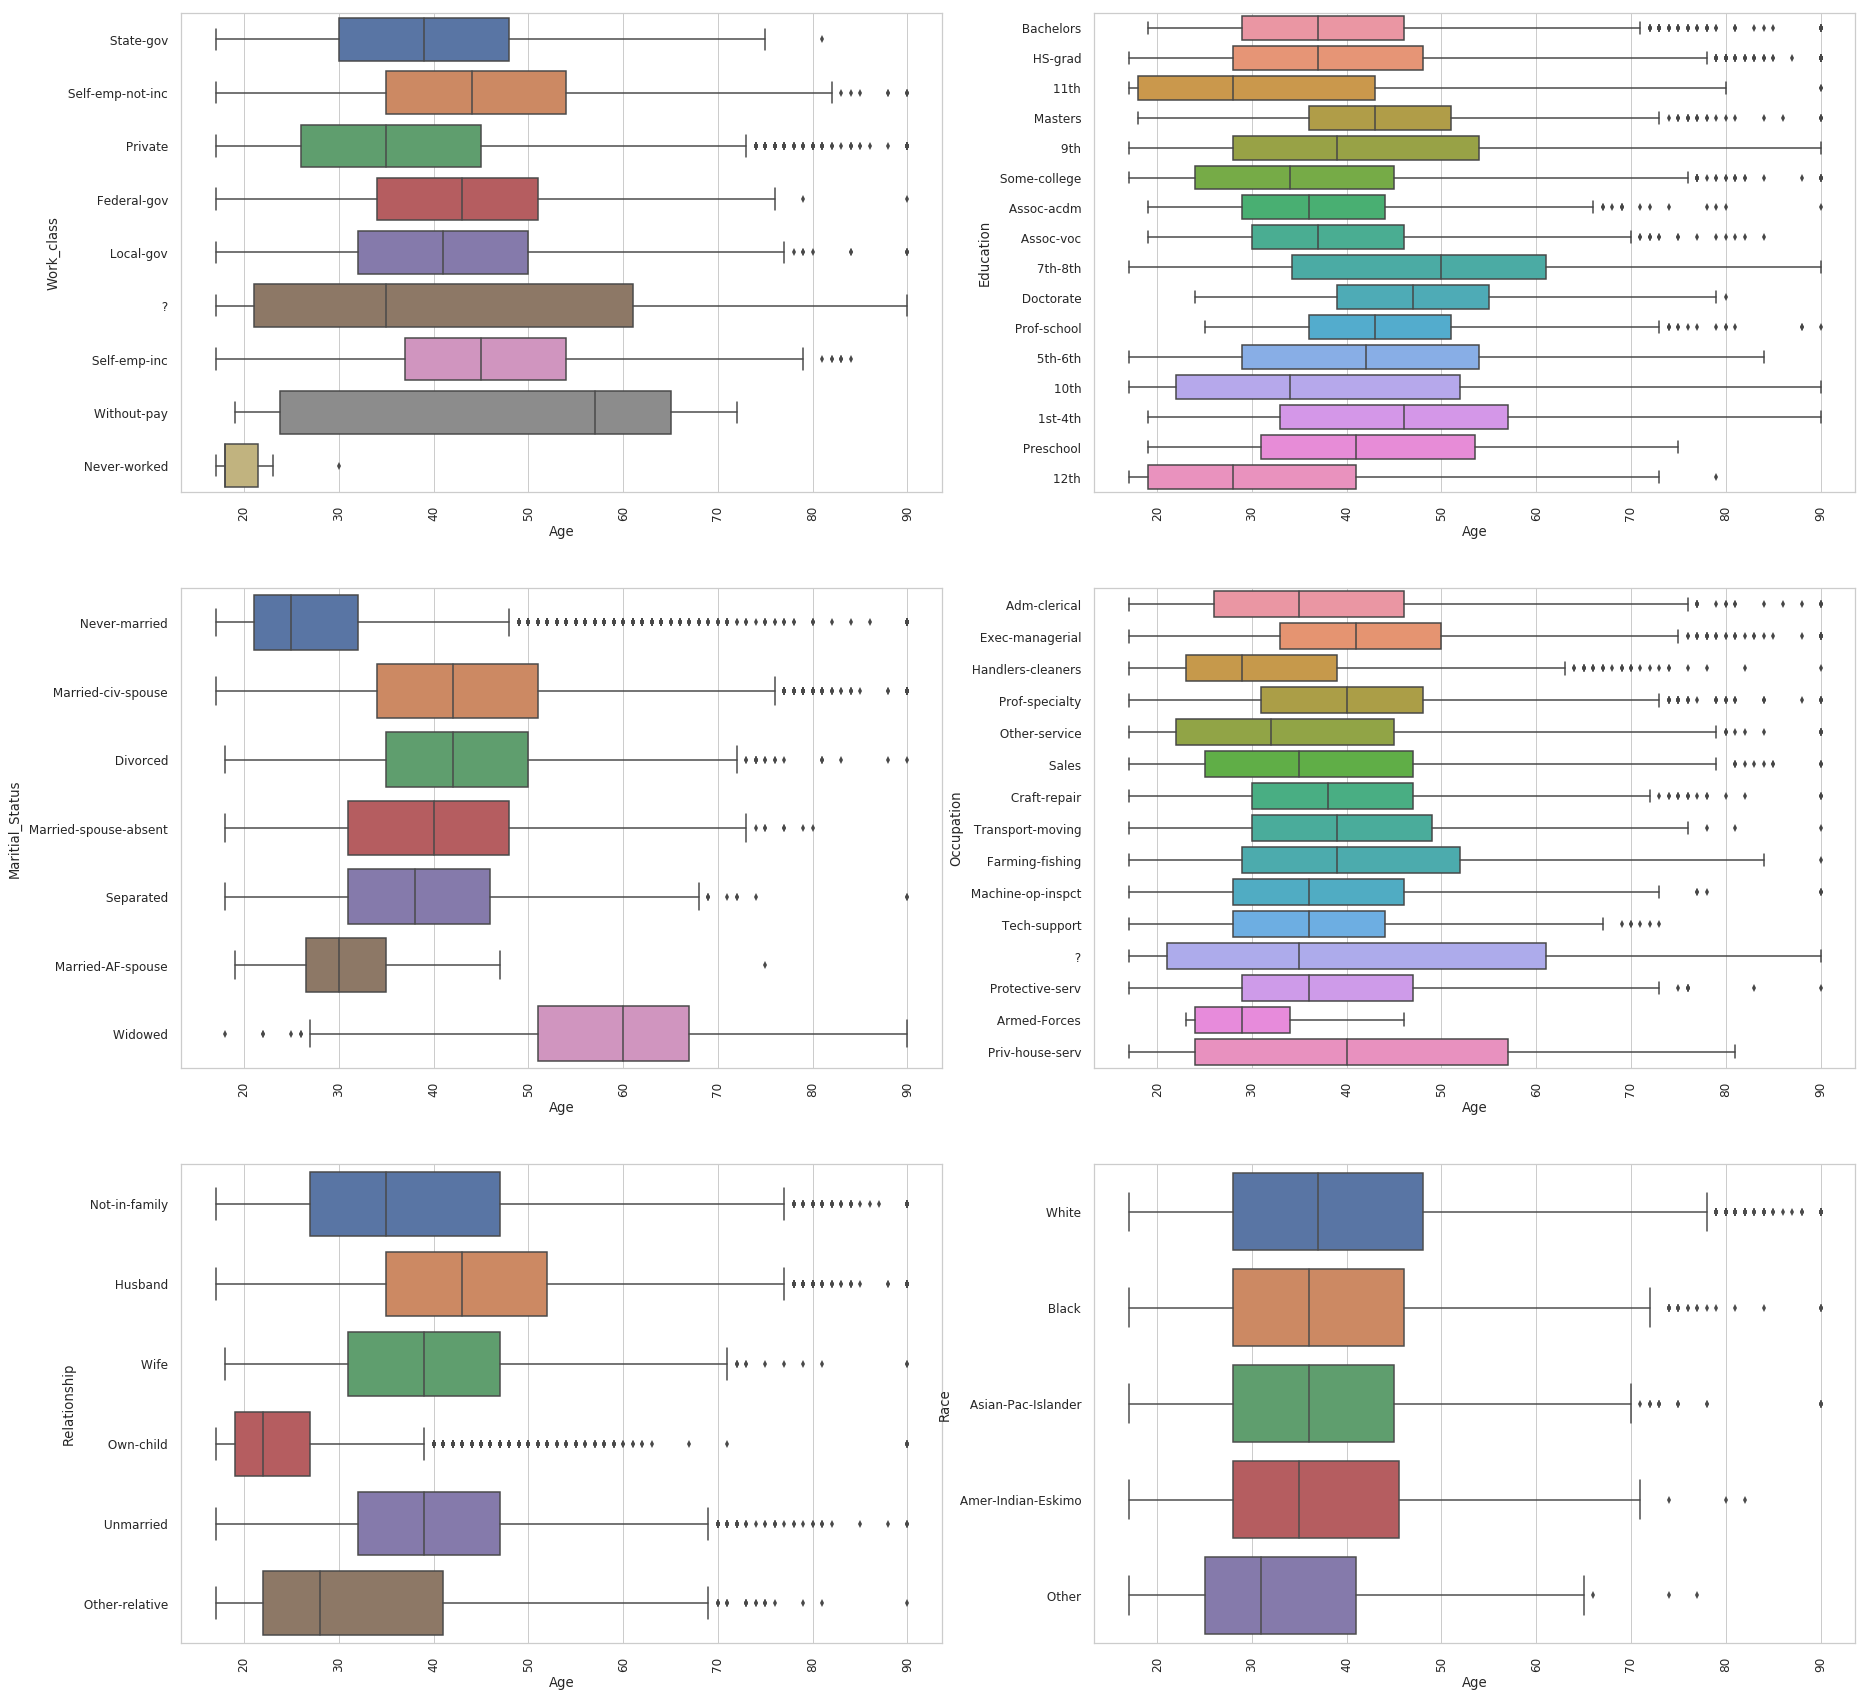

In [18]:
fig, ax = plt.subplots(3, 2, figsize=(30, 30))
for variable, subplot in zip(categorical_d, ax.flatten()):
    sns.boxplot(income['Age' ],income[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        

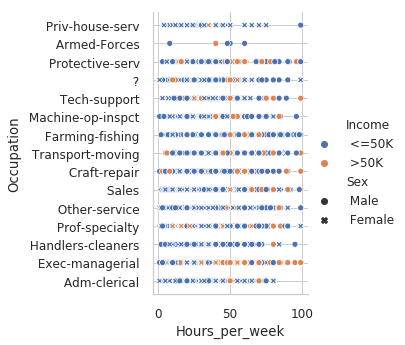

In [19]:
sns.relplot(x ='Hours_per_week', y='Occupation',hue='Income',style='Sex',data=income)
# Transport-moving and Craft-repair occupations are ones in which some males are earning more than 50k working for less than 12 hours
# In Priv-house-serv occupation more no of females are present and are earning less than 50k
# In Protective-serv, tech-support,Machine-op-inspect,Farming-fishing,Craft-repair,Transport-moving,Adm-clerical
# occupation more no of males are present and are earning more than 50k
# In Exec-managerial occupation males working for 40-60 hours are earning more than 50k
# In Prof-speciality some of the females earning more than 50k while working for lesser hours

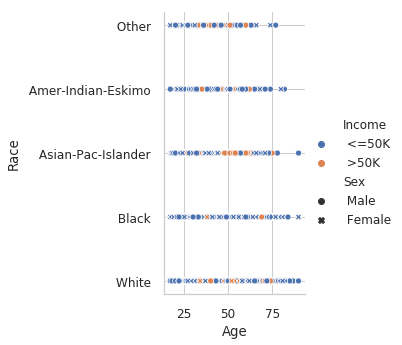

In [20]:
sns.relplot(x='Age',y='Race',hue='Income',style='Sex',data=income)
# In race of Asian-Pac-Islander aged between 45-55 earning more than 50k

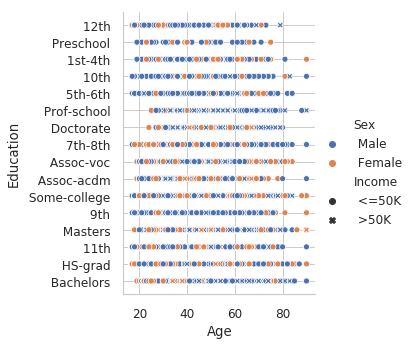

In [21]:
sns.relplot(x='Age',y='Education',hue='Sex',style='Income',data=income)
# More no of males who are educated upto Prof-school, Doctorate and bachelors are earning more than 50k

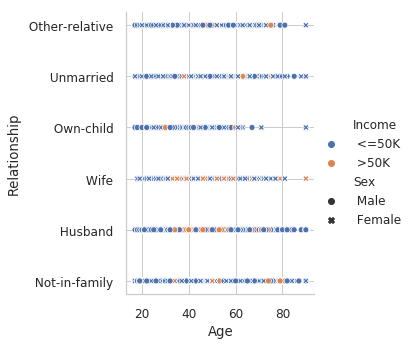

In [22]:
sns.relplot(x='Age',y='Relationship',hue='Income',style='Sex',data=income)

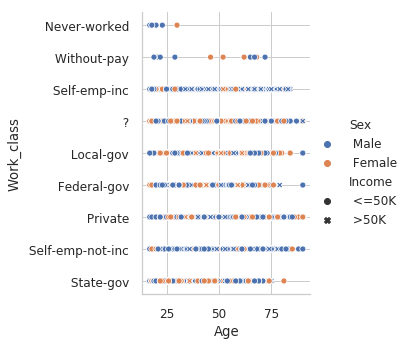

In [23]:
sns.relplot(x='Age',y='Work_class',hue='Sex',style='Income',data=income)
# Self-emp-inc and Self-emp-not-inc work_class contain more no of males earning more than 50k
# Local-gov has males and females earning more than 50k

In [24]:
income.dtypes

Age                 int64
Work_class         object
Fnlwgt              int64
Education          object
Education_num       int64
Maritial_Status    object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country     object
Income             object
dtype: object

In [25]:
# Age, Education_num, Capital_gain, Capital_loss, Hours_per_week - numerical dtypes
# data cleaning - no missing values, treating outliers
# Age

count_age = income.Age.value_counts()
print('count: ',count_age)
q_age1 = income.Age.quantile(0.25)
q_age2 = income.Age.quantile(0.75)
iqr_age = q_age2 -q_age1
lower_age = q_age1 - (1.5*iqr_age)
upper_age = q_age2 + (1.5*iqr_age)
income.Age[income.Age < lower_age] = lower_age
income.Age[income.Age > upper_age] = upper_age

count:  36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64


In [26]:
income.Age.value_counts().sort_index()


17    395
18    550
19    712
20    753
21    720
     ... 
74     51
75     45
76     46
77     29
78    166
Name: Age, Length: 62, dtype: int64

In [27]:

income.Age.unique()#17,78,#16-30,25-4,40-60,60-80
income.Age[(income.Age > 16) & (income.Age <= 20)] = 0
income.Age[(income.Age > 20) & (income.Age <= 25)] = 1
income.Age[(income.Age > 25) & (income.Age <= 30)] = 2
income.Age[(income.Age > 30) & (income.Age <= 35)] = 3
income.Age[(income.Age > 35) & (income.Age <= 40)] = 4
income.Age[(income.Age > 40) & (income.Age <= 45)] = 5
income.Age[(income.Age > 45) & (income.Age <= 50)] = 6
income.Age[(income.Age > 50) & (income.Age <= 55)] = 7
income.Age[(income.Age > 55) & (income.Age <= 60)] = 8
income.Age[(income.Age > 60) & (income.Age <= 65)] = 9
income.Age[(income.Age > 65) & (income.Age <= 70)] = 10
income.Age[(income.Age > 70) & (income.Age <= 80)] = 11




In [28]:

# Education_num is total number of years they are educated, it is already mentioned in education
#del income['Education_num']

# Education_num
count_edu = income.Education_num.value_counts()
print('count: ',count_edu)
q_edu1 = income.Education_num.quantile(0.25)
q_edu2 = income.Education_num.quantile(0.75)
iqr_edu = q_edu2 -q_edu1
lower_edu = q_edu1 - (1.5*iqr_edu)
upper_edu = q_edu2 + (1.5*iqr_edu)
#income.Education_num[income.Education_num < lower_edu] = lower_edu
#income.Education_num[income.Education_num > upper_edu] = upper_edu
print('lower: ',lower_edu,'upper: ',upper_edu)


#del income['Education']



count:  9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64
lower:  4.5 upper:  16.5


In [29]:
#income['Education_num'].value_counts()

In [30]:

# Capital_gain
count_capg = income.Capital_gain.value_counts()
print('count: ',count_capg)
q_capg1 = income.Capital_gain.quantile(0.25)
q_capg2 = income.Capital_gain.quantile(0.75)
iqr_capg = q_capg2 -q_capg1
lower_capg = q_capg1 - (1.5*iqr_capg)
upper_capg = q_capg2 + (1.5*iqr_capg)
unique = income.Capital_gain.unique()
print('unique: ',unique)
unique_med = pd.DataFrame(unique).median()
unique_med
income.Capital_gain[income.Capital_gain < lower_capg] = unique_med[0]
#income.Capital_gain[income.Capital_gain > upper_capg] = unique_med[0]


count:  0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64
unique:  [ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3887  5721  9562  1455  2036  1831 11678  2936  2993  7443  6360  1797
  1173  4687  6723  2009  6097  2653  1639 18481  7978  2387  5060]


In [31]:
income.Capital_gain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64

In [32]:

# Capital_loss
count_capl = income.Capital_loss.value_counts()
print('count: ',count_capl)
q_capl1 = income.Capital_loss.quantile(0.25)
q_capl2 = income.Capital_loss.quantile(0.75)
iqr_capl = q_capl2 -q_capl1
lower_capl = q_capl1 - (1.5*iqr_capl)
upper_capl = q_capl2 + (1.5*iqr_capl)
unique_l = income.Capital_loss.unique()
print('unique: ',unique_l)
unique_medl = pd.DataFrame(unique_l).median()
print('unique_medl:',unique_medl)
income.Capital_loss[income.Capital_loss < lower_capl] = unique_medl[0]
#income.Capital_loss[income.Capital_loss > upper_capl] = unique_medl[0]


count:  0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: Capital_loss, Length: 92, dtype: int64
unique:  [   0 2042 1408 1902 1573 1887 1719 1762 1564 2179 1816 1980 1977 1876
 1340 2206 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653
 2392 1504 2001 1590 1651 1628 1848 1740 2002 1579 2258 1602  419 2547
 2174 2205 1726 2444 1138 2238  625  213 1539  880 1668 1092 1594 3004
 2231 1844  810 2824 2559 2057 1974  974 2149 1825 1735 1258 2129 2603
 2282  323 4356 2246 1617 1648 2489 3770 1755 3683 2267 2080 2457  155
 3900 2201 1944 2467 2163 2754 2472 1411]
unique_medl: 0    1881.5
dtype: float64


In [33]:
income.Capital_loss.value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: Capital_loss, Length: 92, dtype: int64

In [34]:

#Hours_per_week
count_hour = income.Hours_per_week.value_counts()
print('count: ',count_hour)
q_hour1 = income.Hours_per_week.quantile(0.25)
q_hour2 = income.Hours_per_week.quantile(0.75)
print('quantile1: ',q_hour1,'quantile2: ',q_hour2)
iqr_hour = q_hour2 -q_hour1
print('iqr:',iqr_hour)
lower_hour = q_hour1 - (1.5*iqr_hour)
upper_hour = q_hour2 + (1.5*iqr_hour)
print('lower: ',lower_hour ,'upper: ',upper_hour)
income.Hours_per_week[income.Hours_per_week < lower_hour] = lower_hour
income.Hours_per_week[income.Hours_per_week > upper_hour] = upper_hour


count:  40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: Hours_per_week, Length: 94, dtype: int64
quantile1:  40.0 quantile2:  45.0
iqr: 5.0
lower:  32.5 upper:  52.5


In [35]:
income.Hours_per_week.value_counts()

40.0    15217
32.5     5516
52.5     3492
50.0     2819
45.0     1824
35.0     1297
48.0      517
38.0      476
36.0      220
42.0      219
44.0      212
43.0      151
37.0      149
52.0      138
46.0       82
47.0       49
33.0       39
39.0       38
41.0       36
49.0       29
34.0       28
51.0       13
Name: Hours_per_week, dtype: int64

In [36]:
# dealing with numerical data is completed
# next dealing with categorical_data
categorical_d.dtypes

Work_class         object
Education          object
Maritial_Status    object
Occupation         object
Relationship       object
Race               object
Sex                object
Native_country     object
Income             object
dtype: object

In [37]:
# dealing with categorical data
# the columns Race and Sex are very less important when compared to other variables in dataset
# removing both columns -> accuracy - 85.3% - test_size=0.35
# removing Race column  -> accuracy - 85.88%
# removing Sex column   -> accuracy - 85.08%
# After these columns, Capital_loss and Education are less important, followed by Work_class
#print(income_c.Race.value_counts())
#print(income.Race.value_counts())
#sns.boxplot(income.Race)
#del income['Race']
#del income['Sex']
#del income['Education']
#del income['Work_class']
#income_c.Native_country.value_counts().sort_index()
#income_c.Native_country[income_c.Native_country.value_counts() < 100] 
#del income['Fnlwgt']
# removing fnlwgt is reducing the accuracy of model, may be useful for model building
# no column is removed in this dataset


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
income['Work_class']=le.fit_transform(income['Work_class'].astype('str'))
income['Education']=le.fit_transform(income['Education'].astype('str'))
income['Maritial_Status']=le.fit_transform(income['Maritial_Status'].astype('str'))
income['Occupation']=le.fit_transform(income['Occupation'].astype('str'))
income['Relationship']=le.fit_transform(income['Relationship'].astype('str'))
income['Race']=le.fit_transform(income['Race'].astype('str'))
income['Sex']=le.fit_transform(income['Sex'].astype('str'))
income['Native_country']=le.fit_transform(income['Native_country'].astype('str'))
income['Income']=le.fit_transform(income['Income'].astype('str'))

In [39]:
income['Education_num'] = income['Education_num'].astype(int)
income['Capital_loss'] = income['Capital_loss'].astype(int)
income['Hours_per_week'] = income['Hours_per_week'].astype(int)

In [40]:
income.dtypes

Age                int64
Work_class         int64
Fnlwgt             int64
Education          int64
Education_num      int64
Maritial_Status    int64
Occupation         int64
Relationship       int64
Race               int64
Sex                int64
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country     int64
Income             int64
dtype: object

In [41]:
# After conversions, scaling should be appllied on input varaibles
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
input = income.iloc[:,:14]
output = income.iloc[:,14:]


In [43]:
output

Income
0           0
1           0
2           0
3           0
4           0
...       ...
32556       0
32557       1
32558       0
32559       0
32560       1

[32561 rows x 1 columns]

In [44]:
input

Age  Work_class  Fnlwgt  Education  Education_num  Maritial_Status  \
0        4           7   77516          9             13                4   
1        6           6   83311          9             13                2   
2        4           4  215646         11              9                0   
3        7           4  234721          1              7                2   
4        2           4  338409          9             13                2   
...    ...         ...     ...        ...            ...              ...   
32556    2           4  257302          7             12                2   
32557    4           4  154374         11              9                2   
32558    8           4  151910         11              9                6   
32559    1           4  201490         11              9                4   
32560    7           5  287927         11              9                2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               1             1     4    1          2174             0   
1               4             0     4    1             0             0   
2               6             1     4    1             0             0   
3               6             0     2    1             0             0   
4              10             5     2    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32556          13             5     4    0             0             0   
32557           7             0     4    1             0             0   
32558           1             4     4    0             0             0   
32559           1             3     4    1             0             0   
32560           4             5     4    0         15024             0   

       Hours_per_week  Native_country  
0                  40              39  
1                  32              39  
2                  40              39  
3                  40              39  
4                  40               5  
...               ...             ...  
32556              38              39  
32557              40              39  
32558              40              39  
32559              32              39  
32560              40              39  

[32561 rows x 14 columns]

In [45]:
income_n = pd.DataFrame(scaler.fit_transform(input),columns = input.columns)

In [46]:
income_n

Age  Work_class    Fnlwgt  Education  Education_num  \
0     -0.037742    2.150579 -1.063611  -0.335437       1.134739   
1      0.700131    1.463736 -1.008707  -0.335437       1.134739   
2     -0.037742    0.090050  0.245079   0.181332      -0.420060   
3      1.069067    0.090050  0.425801  -2.402511      -1.197459   
4     -0.775615    0.090050  1.408176  -0.335437       1.134739   
...         ...         ...       ...        ...            ...   
32556 -0.775615    0.090050  0.639741  -0.852205       0.746039   
32557 -0.037742    0.090050 -0.335433   0.181332      -0.420060   
32558  1.438004    0.090050 -0.358777   0.181332      -0.420060   
32559 -1.144552    0.090050  0.110960   0.181332      -0.420060   
32560  1.069067    0.776893  0.929893   0.181332      -0.420060   

       Maritial_Status  Occupation  Relationship      Race       Sex  \
0             0.921634   -1.317809     -0.277805  0.393668  0.703071   
1            -0.406212   -0.608387     -0.900181  0.393668  0.703071   
2            -1.734058   -0.135438     -0.277805  0.393668  0.703071   
3            -0.406212   -0.135438     -0.900181 -1.962621  0.703071   
4            -0.406212    0.810458      2.211698 -1.962621 -1.422331   
...                ...         ...           ...       ...       ...   
32556        -0.406212    1.519881      2.211698  0.393668 -1.422331   
32557        -0.406212    0.101036     -0.900181  0.393668  0.703071   
32558         2.249480   -1.317809      1.589322  0.393668 -1.422331   
32559         0.921634   -1.317809      0.966947  0.393668  0.703071   
32560        -0.406212   -0.608387      2.211698  0.393668 -1.422331   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  
0          0.148453      -0.21666       -0.171298        0.291569  
1         -0.145920      -0.21666       -1.459102        0.291569  
2         -0.145920      -0.21666       -0.171298        0.291569  
3         -0.145920      -0.21666       -0.171298        0.291569  
4         -0.145920      -0.21666       -0.171298       -4.054223  
...             ...           ...             ...             ...  
32556     -0.145920      -0.21666       -0.493249        0.291569  
32557     -0.145920      -0.21666       -0.171298        0.291569  
32558     -0.145920      -0.21666       -0.171298        0.291569  
32559     -0.145920      -0.21666       -1.459102        0.291569  
32560      1.888424      -0.21666       -0.171298        0.291569  

[32561 rows x 14 columns]

In [47]:
income_n['Income'] = output['Income']

In [48]:
income_n
# 0 -   <=50k
# 1 -   >50k


Age  Work_class    Fnlwgt  Education  Education_num  \
0     -0.037742    2.150579 -1.063611  -0.335437       1.134739   
1      0.700131    1.463736 -1.008707  -0.335437       1.134739   
2     -0.037742    0.090050  0.245079   0.181332      -0.420060   
3      1.069067    0.090050  0.425801  -2.402511      -1.197459   
4     -0.775615    0.090050  1.408176  -0.335437       1.134739   
...         ...         ...       ...        ...            ...   
32556 -0.775615    0.090050  0.639741  -0.852205       0.746039   
32557 -0.037742    0.090050 -0.335433   0.181332      -0.420060   
32558  1.438004    0.090050 -0.358777   0.181332      -0.420060   
32559 -1.144552    0.090050  0.110960   0.181332      -0.420060   
32560  1.069067    0.776893  0.929893   0.181332      -0.420060   

       Maritial_Status  Occupation  Relationship      Race       Sex  \
0             0.921634   -1.317809     -0.277805  0.393668  0.703071   
1            -0.406212   -0.608387     -0.900181  0.393668  0.703071   
2            -1.734058   -0.135438     -0.277805  0.393668  0.703071   
3            -0.406212   -0.135438     -0.900181 -1.962621  0.703071   
4            -0.406212    0.810458      2.211698 -1.962621 -1.422331   
...                ...         ...           ...       ...       ...   
32556        -0.406212    1.519881      2.211698  0.393668 -1.422331   
32557        -0.406212    0.101036     -0.900181  0.393668  0.703071   
32558         2.249480   -1.317809      1.589322  0.393668 -1.422331   
32559         0.921634   -1.317809      0.966947  0.393668  0.703071   
32560        -0.406212   -0.608387      2.211698  0.393668 -1.422331   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0          0.148453      -0.21666       -0.171298        0.291569       0  
1         -0.145920      -0.21666       -1.459102        0.291569       0  
2         -0.145920      -0.21666       -0.171298        0.291569       0  
3         -0.145920      -0.21666       -0.171298        0.291569       0  
4         -0.145920      -0.21666       -0.171298       -4.054223       0  
...             ...           ...             ...             ...     ...  
32556     -0.145920      -0.21666       -0.493249        0.291569       0  
32557     -0.145920      -0.21666       -0.171298        0.291569       1  
32558     -0.145920      -0.21666       -0.171298        0.291569       0  
32559     -0.145920      -0.21666       -1.459102        0.291569       0  
32560      1.888424      -0.21666       -0.171298        0.291569       1  

[32561 rows x 15 columns]

In [49]:
x_labels = income_n.iloc[:,:14]
y_labels = income_n.iloc[:,14:]


In [50]:
y_labels

Income
0           0
1           0
2           0
3           0
4           0
...       ...
32556       0
32557       1
32558       0
32559       0
32560       1

[32561 rows x 1 columns]

In [51]:
x_labels

Age  Work_class    Fnlwgt  Education  Education_num  \
0     -0.037742    2.150579 -1.063611  -0.335437       1.134739   
1      0.700131    1.463736 -1.008707  -0.335437       1.134739   
2     -0.037742    0.090050  0.245079   0.181332      -0.420060   
3      1.069067    0.090050  0.425801  -2.402511      -1.197459   
4     -0.775615    0.090050  1.408176  -0.335437       1.134739   
...         ...         ...       ...        ...            ...   
32556 -0.775615    0.090050  0.639741  -0.852205       0.746039   
32557 -0.037742    0.090050 -0.335433   0.181332      -0.420060   
32558  1.438004    0.090050 -0.358777   0.181332      -0.420060   
32559 -1.144552    0.090050  0.110960   0.181332      -0.420060   
32560  1.069067    0.776893  0.929893   0.181332      -0.420060   

       Maritial_Status  Occupation  Relationship      Race       Sex  \
0             0.921634   -1.317809     -0.277805  0.393668  0.703071   
1            -0.406212   -0.608387     -0.900181  0.393668  0.703071   
2            -1.734058   -0.135438     -0.277805  0.393668  0.703071   
3            -0.406212   -0.135438     -0.900181 -1.962621  0.703071   
4            -0.406212    0.810458      2.211698 -1.962621 -1.422331   
...                ...         ...           ...       ...       ...   
32556        -0.406212    1.519881      2.211698  0.393668 -1.422331   
32557        -0.406212    0.101036     -0.900181  0.393668  0.703071   
32558         2.249480   -1.317809      1.589322  0.393668 -1.422331   
32559         0.921634   -1.317809      0.966947  0.393668  0.703071   
32560        -0.406212   -0.608387      2.211698  0.393668 -1.422331   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  
0          0.148453      -0.21666       -0.171298        0.291569  
1         -0.145920      -0.21666       -1.459102        0.291569  
2         -0.145920      -0.21666       -0.171298        0.291569  
3         -0.145920      -0.21666       -0.171298        0.291569  
4         -0.145920      -0.21666       -0.171298       -4.054223  
...             ...           ...             ...             ...  
32556     -0.145920      -0.21666       -0.493249        0.291569  
32557     -0.145920      -0.21666       -0.171298        0.291569  
32558     -0.145920      -0.21666       -0.171298        0.291569  
32559     -0.145920      -0.21666       -1.459102        0.291569  
32560      1.888424      -0.21666       -0.171298        0.291569  

[32561 rows x 14 columns]

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_labels,y_labels,test_size = 0.25)
#x_train

In [53]:
#x_test
#y_train
#y_test

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_labels,y_labels)
lr_pred = lr.predict(x_labels)
lr_pred

array([0, 0, 0, ..., 0, 0, 1])

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
confusion_matrix_lr = confusion_matrix(y_labels,lr_pred)
print(confusion_matrix_lr)
accuracy_score_lr = accuracy_score(y_labels,lr_pred)
print(accuracy_score_lr)

[[23310  1410]
 [ 4241  3600]]
0.8264488191394613


In [56]:
# using splitting data
lr.fit(x_train,y_train)
lr_pred1 = lr.predict(x_test)
lr_pred1

array([1, 0, 0, ..., 0, 0, 1])

In [57]:
confusion_matrix_lr1 = confusion_matrix(y_test,lr_pred1)
print('confusion_matrix of linear regression is:',confusion_matrix_lr1)
print('\n')
accuracy_score_lr1 = accuracy_score(y_test,lr_pred1)
print('accuracy score of linear regression is:',accuracy_score_lr1)

confusion_matrix of linear regression is: [[5852  365]
 [ 995  929]]


accuracy score of linear regression is: 0.8329443557302543


In [58]:
# Applying supervised algorithms 
# Knn
from sklearn.neighbors import KNeighborsClassifier
classifier_k = KNeighborsClassifier(n_neighbors=3)
classifier_k.fit(x_train,y_train)
knn_pred = classifier_k.predict(x_test)
print(knn_pred)
confusion_matrix_knn = confusion_matrix(y_test,knn_pred)
print('confusion_matrix for knn is:  ' ,confusion_matrix_lr1)
print('')
accuracy_score_knn = accuracy_score(y_test,knn_pred)
print('accuracy_score for knn is: ',accuracy_score_knn)


[0 0 0 ... 0 0 1]
confusion_matrix for knn is:   [[5852  365]
 [ 995  929]]

accuracy_score for knn is:  0.8213978626704336


In [59]:
# naive-bayes
from sklearn.naive_bayes import GaussianNB
classifier_n = GaussianNB()
classifier_n.fit(x_train,y_train)
nb_pred = classifier_n.predict(x_test)
print(nb_pred)
confusion_matrix_nb = confusion_matrix(y_test,nb_pred)
print('confusion_matrix for naive bayes is:  ' ,confusion_matrix_nb)
print('')
accuracy_score_nb = accuracy_score(y_test,nb_pred)
print('accuracy_score for naive bayes is: ',accuracy_score_nb)


[0 0 0 ... 0 0 0]
confusion_matrix for naive bayes is:   [[5902  315]
 [1188  736]]

accuracy_score for naive bayes is:  0.8153789460754207


In [60]:
# support vector machine
from sklearn.svm import SVC
classifier_s = SVC(kernel = 'linear')
classifier_s.fit(x_train,y_train)
svm_pred = classifier_s.predict(x_test)
print(svm_pred)
confusion_matrix_svm = confusion_matrix(y_test,svm_pred)
print('confusion_matrix for support vector machine is:  ' ,confusion_matrix_svm)
print('')
accuracy_score_svm = accuracy_score(y_test,svm_pred)
print('accuracy_score for support vector machine is: ',accuracy_score_svm)


[0 0 0 ... 0 0 0]
confusion_matrix for support vector machine is:   [[6060  157]
 [1273  651]]

accuracy_score for support vector machine is:  0.8243459034516644


In [61]:
# svm - rbf
from sklearn.svm import SVC
classifier_sr = SVC(kernel = 'rbf')
classifier_sr.fit(x_train,y_train)
svmr_pred = classifier_sr.predict(x_test)
print(svmr_pred)
confusion_matrix_svmr = confusion_matrix(y_test,svmr_pred)
print('confusion_matrix for support vector machine is:  ' ,confusion_matrix_svmr)
print('')
accuracy_score_svmr= accuracy_score(y_test,svmr_pred)
print('accuracy_score for support vector machine is: ',accuracy_score_svmr)


[0 0 0 ... 0 0 1]
confusion_matrix for support vector machine is:   [[5856  361]
 [ 841 1083]]

accuracy_score for support vector machine is:  0.8523522908733571


In [62]:
# svm - poly
from sklearn.svm import SVC
classifier_sp = SVC(kernel = 'poly')
classifier_sp.fit(x_train,y_train)
svmp_pred = classifier_sp.predict(x_test)
print(svmp_pred)
confusion_matrix_svmp = confusion_matrix(y_test,svmp_pred)
print('confusion_matrix for support vector machine is:  ' ,confusion_matrix_svmp)
print('')
accuracy_score_svmp= accuracy_score(y_test,svmp_pred)
print('accuracy_score for support vector machine is: ',accuracy_score_svmp)


[0 0 0 ... 0 0 1]
confusion_matrix for support vector machine is:   [[5892  325]
 [ 902 1022]]

accuracy_score for support vector machine is:  0.849281415059575


In [63]:
# svm - sigmoid
# svm - rbf
from sklearn.svm import SVC
classifier_ss = SVC(kernel = 'sigmoid')
classifier_ss.fit(x_train,y_train)
svms_pred = classifier_ss.predict(x_test)
print(svms_pred)
confusion_matrix_svms = confusion_matrix(y_test,svms_pred)
print('confusion_matrix for support vector machine is:  ' ,confusion_matrix_svms)
print('')
accuracy_score_svms= accuracy_score(y_test,svms_pred)
print('accuracy_score for support vector machine is: ',accuracy_score_svms)


[1 0 0 ... 1 0 0]
confusion_matrix for support vector machine is:   [[5198 1019]
 [ 980  944]]

accuracy_score for support vector machine is:  0.754452769929984


In [64]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_d = DecisionTreeClassifier(criterion ='entropy',random_state = 0)
classifier_d.fit(x_train,y_train)
deci_pred = classifier_d.predict(x_test)
print(deci_pred)
confusion_matrix_deci = confusion_matrix(y_test,deci_pred)
print('confusion_matrix for Decision Tree is:  ' ,confusion_matrix_deci)
print('')
accuracy_score_deci= accuracy_score(y_test,deci_pred)
print('accuracy_score for Decision Tree is: ',accuracy_score_deci)


[0 0 0 ... 0 0 0]
confusion_matrix for Decision Tree is:   [[5436  781]
 [ 708 1216]]

accuracy_score for Decision Tree is:  0.8170986365311387


In [65]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_r = RandomForestClassifier(n_estimators=80,criterion ='entropy',random_state = 42)
classifier_r.fit(x_train,y_train)
rand_pred = classifier_r.predict(x_test)
print(rand_pred)
confusion_matrix_rand = confusion_matrix(y_test,rand_pred)
print('confusion_matrix for Random Forest is:  ' ,confusion_matrix_rand)
print('')
accuracy_score_rand= accuracy_score(y_test,rand_pred)
print('accuracy_score for Random Forest is: ',accuracy_score_rand)


[0 0 0 ... 0 0 0]
confusion_matrix for Random Forest is:   [[5735  482]
 [ 690 1234]]

accuracy_score for Random Forest is:  0.8560373418498956


In [66]:

# Application of PCA
from sklearn.decomposition import PCA
pca1 = PCA(n_components =10 )
pca = pca1.fit_transform(x_labels)
pca
income_pca = pd.DataFrame(pca)
income_pca



0         1         2         3         4         5         6  \
0      0.655788 -0.498111 -0.408406 -0.764258 -0.203086  0.225147 -1.099450   
1      1.017880 -0.087540  0.287633 -0.586443 -0.822986  0.017055 -0.665067   
2      0.868623  0.496777  0.511679 -0.367483 -0.155580  0.218395  0.549493   
3      0.262328  2.853740 -0.032896  0.893227 -0.717553  0.089833 -0.022786   
4     -2.165271 -0.582690 -1.971312  4.067341 -0.346141 -0.445373  0.934635   
...         ...       ...       ...       ...       ...       ...       ...   
32556 -1.728395 -1.064093 -1.187730 -0.480096 -1.093835  0.165432  1.487600   
32557  0.835181  0.497482  0.127893 -0.616337  0.093085  0.116093 -0.423940   
32558 -2.050557 -0.466081  0.933352 -0.384235 -0.527633  0.133727 -0.146974   
32559 -1.625484  0.156933  0.119558 -0.896529  1.097529  0.243541 -0.362522   
32560 -1.159592 -0.852729  0.518754  0.422242 -1.365799  1.537797  2.187261   

              7         8         9  
0      0.469840  0.521561  0.064336  
1     -0.182063 -0.074872  1.281621  
2     -0.906580  0.026580 -0.184681  
3      0.012698 -1.878652 -0.505911  
4     -0.962941  1.584376 -0.196266  
...         ...       ...       ...  
32556 -0.217184  0.055488 -0.285257  
32557 -0.269238 -0.085154  0.309740  
32558  0.567416  0.378586  0.469915  
32559  0.190743  0.261242  0.358781  
32560  0.537671  0.323194 -0.264881  

[32561 rows x 10 columns]

In [67]:

# The amount of variance that each PCA explains is 
var = pca1.explained_variance_ratio_
var
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1



array([15.44, 25.53, 34.49, 42.5 , 50.19, 57.55, 64.35, 70.97, 77.02,
       82.86])

In [68]:

income_pca['Income'] = income_n['Income']
income_pca
pca_x = income_pca.iloc[:,:10]
pca_y = income_pca.iloc[:,10:]
pca_y
pca_xtrain,pca_xtest,pca_ytrain,pca_ytest = train_test_split(pca_x,pca_y,test_size=0.25)
#pca_ytrain
#pca_ytest
#pca_xtrain
#pca_xtest


In [69]:

# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_rp = RandomForestClassifier(n_estimators=100,criterion ='entropy',random_state = 0)
classifier_rp.fit(pca_xtrain,pca_ytrain)
randp_pred = classifier_rp.predict(pca_xtest)
print(randp_pred)
confusion_matrix_randp = confusion_matrix(pca_ytest,randp_pred)
print('confusion_matrix for Random Forest is:  ' ,confusion_matrix_randp)
print('')
accuracy_score_randp= accuracy_score(pca_ytest,randp_pred)
print('accuracy_score for Random Forest is: ',accuracy_score_randp)


[0 1 0 ... 0 0 0]
confusion_matrix for Random Forest is:   [[5721  417]
 [ 855 1148]]

accuracy_score for Random Forest is:  0.8437538385947673


In [70]:
# May be applying pca is a bad idea, using pca is not useful
imp_var = pd.DataFrame(classifier_r.feature_importances_,[input.columns])

In [71]:
imp_var

0
Age              0.114368
Work_class       0.045774
Fnlwgt           0.210438
Education        0.035256
Education_num    0.081224
Maritial_Status  0.083580
Occupation       0.074275
Relationship     0.095082
Race             0.017148
Sex              0.016269
Capital_gain     0.104477
Capital_loss     0.030451
Hours_per_week   0.072648
Native_country   0.019010

In [72]:
income_n

Age  Work_class    Fnlwgt  Education  Education_num  \
0     -0.037742    2.150579 -1.063611  -0.335437       1.134739   
1      0.700131    1.463736 -1.008707  -0.335437       1.134739   
2     -0.037742    0.090050  0.245079   0.181332      -0.420060   
3      1.069067    0.090050  0.425801  -2.402511      -1.197459   
4     -0.775615    0.090050  1.408176  -0.335437       1.134739   
...         ...         ...       ...        ...            ...   
32556 -0.775615    0.090050  0.639741  -0.852205       0.746039   
32557 -0.037742    0.090050 -0.335433   0.181332      -0.420060   
32558  1.438004    0.090050 -0.358777   0.181332      -0.420060   
32559 -1.144552    0.090050  0.110960   0.181332      -0.420060   
32560  1.069067    0.776893  0.929893   0.181332      -0.420060   

       Maritial_Status  Occupation  Relationship      Race       Sex  \
0             0.921634   -1.317809     -0.277805  0.393668  0.703071   
1            -0.406212   -0.608387     -0.900181  0.393668  0.703071   
2            -1.734058   -0.135438     -0.277805  0.393668  0.703071   
3            -0.406212   -0.135438     -0.900181 -1.962621  0.703071   
4            -0.406212    0.810458      2.211698 -1.962621 -1.422331   
...                ...         ...           ...       ...       ...   
32556        -0.406212    1.519881      2.211698  0.393668 -1.422331   
32557        -0.406212    0.101036     -0.900181  0.393668  0.703071   
32558         2.249480   -1.317809      1.589322  0.393668 -1.422331   
32559         0.921634   -1.317809      0.966947  0.393668  0.703071   
32560        -0.406212   -0.608387      2.211698  0.393668 -1.422331   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0          0.148453      -0.21666       -0.171298        0.291569       0  
1         -0.145920      -0.21666       -1.459102        0.291569       0  
2         -0.145920      -0.21666       -0.171298        0.291569       0  
3         -0.145920      -0.21666       -0.171298        0.291569       0  
4         -0.145920      -0.21666       -0.171298       -4.054223       0  
...             ...           ...             ...             ...     ...  
32556     -0.145920      -0.21666       -0.493249        0.291569       0  
32557     -0.145920      -0.21666       -0.171298        0.291569       1  
32558     -0.145920      -0.21666       -0.171298        0.291569       0  
32559     -0.145920      -0.21666       -1.459102        0.291569       0  
32560      1.888424      -0.21666       -0.171298        0.291569       1  

[32561 rows x 15 columns]

In [73]:
income_c

Age         Work_class  Fnlwgt    Education  Education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

           Maritial_Status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [74]:
print('accuracy of random forest: ',accuracy_score_rand)
print('accuracy of decision tree: ',accuracy_score_deci)
print('accuracy of linear regression: ',accuracy_score_lr)
print('accuracy of knn: ',accuracy_score_knn)
print('accuracy of naive bayes: ',accuracy_score_nb)
print('accuracy of svm: ',accuracy_score_svm)
print('accuracy of svm-rbf: ',accuracy_score_svmr)
print('accuracy of svm-poly : ',accuracy_score_svmp)
print('accuracy of svm-sigmoid: ',accuracy_score_svms)


accuracy of random forest:  0.8560373418498956
accuracy of decision tree:  0.8170986365311387
accuracy of linear regression:  0.8264488191394613
accuracy of knn:  0.8213978626704336
accuracy of naive bayes:  0.8153789460754207
accuracy of svm:  0.8243459034516644
accuracy of svm-rbf:  0.8523522908733571
accuracy of svm-poly :  0.849281415059575
accuracy of svm-sigmoid:  0.754452769929984


In [75]:
# Best model -> random forest
# May be increasing the test_size will increase accuracy
# May be by removing columns like Race, Sex, Education, Capital_loss, Capital_gain, accuracy may be increased, 
